# Training plot

In [70]:
import matplotlib.pyplot as plt
import numpy as np

training_data = np.load('temp/Training loss data.npy')
loss = training_data[0]
val_loss = training_data[1]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('trainPlot/Training and Validation loss')
plt.close()

plt.plot(epochs[-10000:], loss[-10000:], 'b-', label='Training loss')
# plt.plot(epochs[-300:], val_loss[-300:], 'r-', label='Validation loss')
plt.title('Training and Validation loss the last 10000 epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.legend()
plt.savefig('trainPlot/Training and Validation loss the last 10000 epochs')
plt.close()

plt.plot(epochs[2500:], loss[2500:], 'b-', label='Training loss')
# plt.plot(epochs[-300:], val_loss[-300:], 'r-', label='Validation loss')
plt.title('Training and Validation loss the after 2500 epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.legend()
plt.savefig('trainPlot/Training and Validation loss after 2500 epochs')
plt.close()

plt.plot(epochs[:200], loss[:200], 'b-', label='Training loss')
plt.plot(epochs[:200], val_loss[:200], 'r-', label='Validation loss')
plt.title('Training and Validation loss loss first 200 epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('trainPlot/Training and Validation loss first 200 epochs')
plt.close()

# Predictions and Testing data

In [71]:
import numpy as np
import pandas as pd
from os import listdir, mkdir, path
from matplotlib import pyplot as plt

airfoil = 'ah94156'
test_dir = f'test/{airfoil}.dat/v40/'
predictions = np.load('temp/predictions.npy')
if not path.exists(f'testPlot/{airfoil}'):
    mkdir(f'testPlot/{airfoil}/')

# Plotting data process
for plotting_index in range(3):
    
    plotting_predictions = predictions[plotting_index]
    datalst = listdir(test_dir)
    filename = test_dir + datalst[plotting_index]
    aoa = filename.split(' ')[1].split('.npz')[0]
    x = np.moveaxis(np.load('temp/data0.npy'), 0, 1)[0]
    data = np.load(filename)
    y = np.zeros(101)
    cf = np.zeros(101)
    for i in range(101):
        y[i] = float(data['input'][0][i])
        cf[i] = data['cf'][0][i]

    # predictions
    df = pd.DataFrame({'x':x, 'y':y, 'prediction':plotting_predictions, 'cf':cf})
    df_upper = df[df['y'] > 0.]
    df_lower = df[df['y'] < 0.]
    upper = df_upper.sort_values(by=['x'])
    lower = df_lower.sort_values(by=['x'])
    upper['mape'] = np.absolute((upper['cf'] - upper['prediction']) / upper['cf'])
    lower['mape'] = np.absolute((lower['cf'] - lower['prediction']) / lower['cf'])

    upper = upper[upper['mape'] < 1.0]
    lower = lower[lower['mape'] < 1.0]
    mape = [np.mean(upper['mape']), np.mean(lower['mape'])]
    print(f'AOA : {aoa}\nupper mape : {mape[0] * 100}%\nlower mape : {mape[1] * 100}%')

    # mkdir(f'testPlot/{airfoil}/{aoa}')
    # fig, ax = plt.subplots(2,1, sharex=True)

    plt.plot(upper['x'], upper['prediction'], 'bo-', label='prediction')
    plt.plot(upper['x'], upper['cf'], 'ro-', label='CFD')
    plt.legend()
    plt.title(f'Upper surface - AOA : {aoa}')
    plt.xlabel('x poisition')
    plt.ylabel('Shear Stress coefficient')
    plt.savefig(f'testPlot/{airfoil}/{aoa}/upper surface')
    plt.close()

    plt.plot(lower['x'], lower['prediction'], 'bo-', label='prediction')
    plt.plot(lower['x'], lower['cf'], 'ro-', label='CFD')
    plt.legend()
    plt.title(f'Lower surface - AOA : {aoa}')
    plt.xlabel('x poisition')
    plt.ylabel('Shear Stress coefficient')
    plt.savefig(f'testPlot/{airfoil}/{aoa}/lower surface')
    plt.close()

    # ax[0].set_title('Upper surface')
    # ax[0].plot(upper['x'], upper['prediction'], 'bo-', label='prediction')
    # ax[0].plot(upper['x'], upper['cf'], 'ro-', label='CFD')
    # ax[0].legend()
    # ax[0].set_xlabel('x position')
    # ax[0].set_ylabel('Shear Stress coefficient')
    # ax[1].set_title('lower surface')
    # ax[1].plot(lower['x'], lower['prediction'], 'bo-', label='prediction')
    # ax[1].plot(lower['x'], lower['cf'], 'ro-', label='CFD')
    # ax[1].legend()
    # ax[1].set_ylabel('Shear Stress coefficient')
    # plt.savefig(f'testPlot/ah94156/{aoa}/CFD vs Prediction')
    # plt.close()


AOA : 0
upper mape : 19.531624576791458%
lower mape : 16.78117289291843%
AOA : -5.0
upper mape : 29.60399584881091%
lower mape : 23.847438064736746%
AOA : 5.0
upper mape : 12.662530707048129%
lower mape : 9.777712792382747%


# Testing dataSet Cf Plotting

npz key=cf shape is : (1, 101, 1)


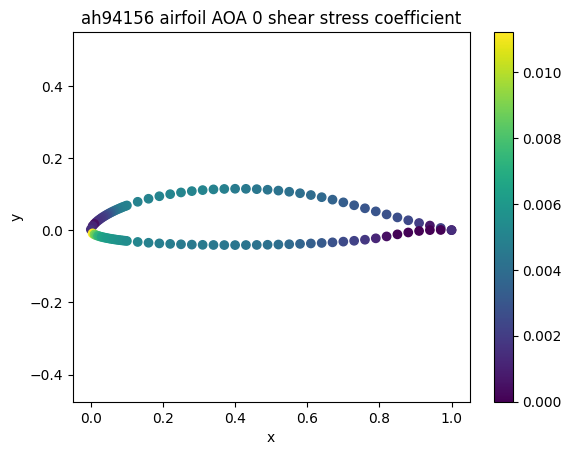

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from os import listdir
datadir = 'test/ah94156.dat/v40/'
datalst = listdir(datadir)
data = np.load(datadir + datalst[10]) # 讀取第 n 筆數據

print(f"npz key=cf shape is : {data['cf'].shape}")
cf = data['cf'][0]

x = np.moveaxis(np.load('temp/data0.npy'), 0, 1)[0]
y = np.zeros(101)
for i in range(101):
    y[i] = data['input'][0][i]

plt.scatter(x,y, c=cf)
plt.title('ah94156 airfoil AOA 0 shear stress coefficient')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.colorbar()

# AOA Plotting

In [44]:
import numpy as np
import pandas as pd
from os import listdir, mkdir, path
from matplotlib import pyplot as plt

airfoil = 'ah94156'
test_dir = f'test/{airfoil}.dat/v40/'
predictions = np.load('temp/predictions.npy')
if not path.exists(f'testPlot/{airfoil}'):
    mkdir(f'testPlot/{airfoil}/')

plotting_index = 1
plotting_predictions = predictions[plotting_index]
datalst = listdir(test_dir)
filename = test_dir + datalst[plotting_index]
aoa = filename.split(' ')[1].split('.npz')[0]
x = np.moveaxis(np.load('temp/data0.npy'), 0, 1)[0]
data = np.load(filename)
y = np.zeros(101)
cf = np.zeros(101)
for i in range(101):
    y[i] = float(data['input'][0][i])
    cf[i] = data['cf'][0][i]

# predictions
df = pd.DataFrame({'x':x, 'y':y, 'prediction':plotting_predictions, 'cf':cf})
df_upper = df[df['y'] > 0.]
df_lower = df[df['y'] < 0.]
upper = df_upper.sort_values(by=['x'])
lower = df_lower.sort_values(by=['x'])
upper['mape'] = np.absolute((upper['cf'] - upper['prediction']) / upper['cf'])
lower['mape'] = np.absolute((lower['cf'] - lower['prediction']) / lower['cf'])

upper = upper[upper['mape'] < 1.0]
lower = lower[lower['mape'] < 1.0]
mape = [np.mean(upper['mape']), np.mean(lower['mape'])]
print(f'AOA : {aoa}\nupper mape : {mape[0] * 100}%\nlower mape : {mape[1] * 100}%')
# mape
# df_mape_upper = upper[upper['cf'] > 0.]
# df_mape_lower = lower[lower['cf'] > 0.]
# mape_upper = np.mean(np.absolute((df_mape_upper['cf'] - df_mape_upper['prediction']) / df_mape_upper['cf']))
# mape_lower = np.mean(np.absolute((df_mape_lower['cf'] - df_mape_lower['prediction']) / df_mape_lower['cf']))
# print(f'AOA : {aoa}, upper MAPE : {mape_upper * 100} %')
# print(f'AOA : {aoa}, lower MAPE : {mape_lower * 100} %')

# upper.head(110)

AOA : -5.0
upper mape : 29.98089696938487%
lower mape : 21.927757830924204%
